<h1>Data Synthesis Through Cholesky Distribution (Multiple case)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def generate_correlated_random_variables(mean, covariance, num_samples):
    L = np.linalg.cholesky(covariance)
    normal_samples = np.random.normal(size=(num_samples, covariance.shape[0]))
    return mean + np.dot(normal_samples, L.T)

In [3]:
def generate_covariance_matrix(num_variables, correlations):
    covariance = np.zeros((num_variables, num_variables))
    for i in range(num_variables):
        for j in range(i, num_variables):
            if i == j:
                covariance[i, j] = 1
            else:
                covariance[i, j] = correlations[i][j - i - 1]
                covariance[j, i] = correlations[i][j - i - 1]
    return covariance

In [4]:
def is_positive_definite(matrix):
    try:
        np.linalg.cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

In [5]:
def main():
    num_variables = int(input("Enter the number of variables (default 3): ") or 3)
    mean = [0] * num_variables
    correlations = []
    for i in range(num_variables):
        row = []
        for j in range(i + 1, num_variables):
            default_value = min((i+j)*0.2,0.9)
            row.append(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: (default: {default_value}) ") or default_value))
            #row.append(float(input(f"Enter the correlation between X{i + 1} and X{j + 1}: ")))
        correlations.append(row)
    covariance = generate_covariance_matrix(num_variables, correlations)
    
    while not is_positive_definite(covariance):
        print("The covariance matrix is not positive definite.")
        i = len(correlations) - 1
        j = len(correlations[i]) - 1
        while j < 0:
            i -= 1
            j = len(correlations[i]) - 1
        latest_input = correlations[i][j]
        latest_input = max(0, latest_input - 0.01)
        correlations[i][j] = latest_input
        j -= 1
        covariance = generate_covariance_matrix(num_variables, correlations)
        
    num_samples = 1000
    samples = generate_correlated_random_variables(mean, covariance, num_samples)
    df = pd.DataFrame(samples, columns=['X' + str(i + 1) for i in range(num_variables)])

    # Check the correlation of the generated variables
    correlation = df.corr()
    print("Correlation matrix:")
    print(correlation)
    
    # Visualize the distribution of the generated variables
    sns.pairplot(df)
    plt.show()
    
    print(df)
    
    return df

Enter the number of variables (default 3): 
Enter the correlation between X1 and X2: (default: 0.2) 0.3
Enter the correlation between X1 and X3: (default: 0.4) .6
Enter the correlation between X2 and X3: (default: 0.6000000000000001) 
Correlation matrix:
          X1        X2        X3
X1  1.000000  0.364547  0.618341
X2  0.364547  1.000000  0.645276
X3  0.618341  0.645276  1.000000


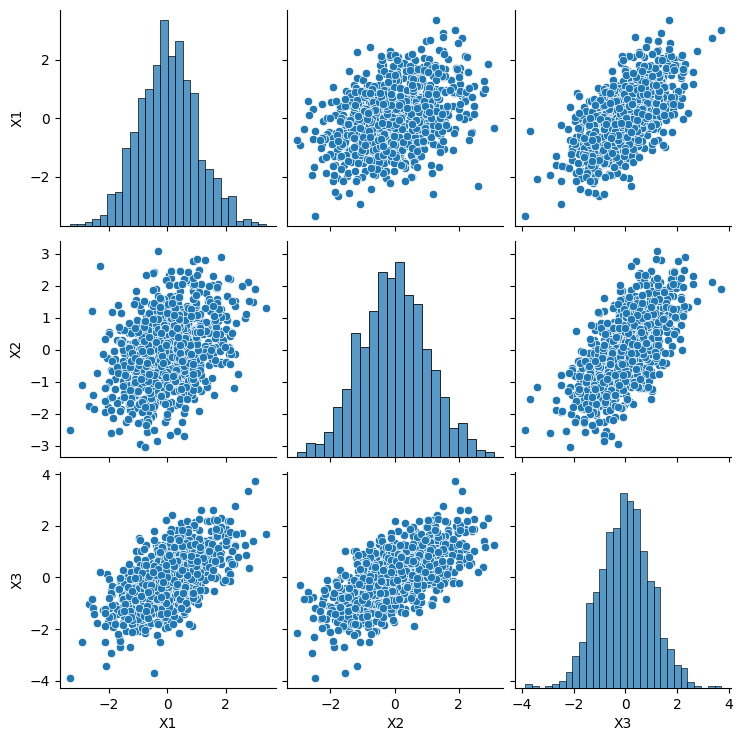

           X1        X2        X3
0    0.809117  0.484017  0.905443
1    0.183698 -0.781682 -0.080748
2    0.771272  2.104692  1.336248
3   -1.617634 -1.582646 -2.698901
4   -1.872623 -2.126931 -1.906687
..        ...       ...       ...
995 -0.209931 -1.442671 -0.756302
996  1.985602  0.084309 -0.089929
997  0.181012 -0.830368 -1.800053
998  0.870891 -0.439588 -0.596661
999  0.064076 -1.148465  0.879544

[1000 rows x 3 columns]


In [6]:
if __name__ == '__main__':
    df = main()